# Recitation 5: Feed Forward Neural Networks using Numpy

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def scale_features(x):
    """
    Min-Max Normalization
     - Normalize the input between 0 and 1
    
    """
    max_inp = np.max(x, axis=0)
    min_inp = np.min(x, axis=0)

    return (x - min_inp) / (max_inp - min_inp)

def sigmoid(x):
    """
    Sigmoid function.
    """
    return 1.0 / (1.0 + np.exp(-x))


def train_test_split(x, y, train_ratio=0.6):
    """
    Split the data into test and train sets
    """
    num_samples = len(x)
    num_train = int(train_ratio * num_samples)
    x_train = x[:num_train]
    y_train = y[:num_train]
    x_test = x[num_train:]
    y_test = y[num_train:]
    return x_train, x_test, y_train, y_test

(1000, 1)
(1000, 1)


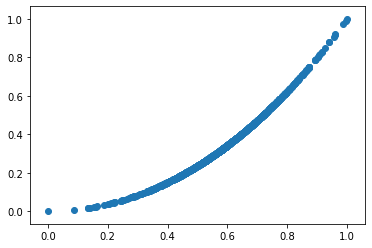

In [11]:
# function that we will fit
def func(x):
    return np.cos(x) + x ** 2

num_samples = 1000
np.random.seed(6)
x = np.random.randn(num_samples, 1)
x = scale_features(np.sort(x))
y = scale_features(func(x))

print(x.shape)
print(y.shape)

# plot 
plt.scatter(x, y)

In [12]:
def network(layers):
    """
    Initializing a neural network.
    
    For layer i, weight has shape (layers[i + 1], layers[i]), bias has shape (layers[i + 1], 1)
    Apply random initialization to weight and zero initialization to bias.
    
    Parameters:
        layers (list)      -- list of hidden layer size
    
    Return:
        w (list)           -- list of weight
        b (list)           -- list of bias
    """
    w = []
    b = []
    for i_layer in range(len(layers) - 1):
        weights_layer = 0.01 * np.random.randn(layers[i_layer + 1], layers[i_layer])
        bias_layer = np.zeros((layers[i_layer + 1], 1))
        w.append(weights_layer)
        b.append(bias_layer)
    return w, b


In [7]:
def forward(w, b, inputs):
    """
    Forward pass function.
    
    Parameters:
        w (list)              -- list of weight
        b (list)              -- list of bias
        inputs (ndarray)      -- model input for each sample, should have shape (num_samples, 1)
    """
    
    inp_layer_val = inputs
    # Stores the hidden and output layer values after activation
    layer_vals = []  
    
    for i_layer, (i_w, i_b) in enumerate(zip(w, b)):
        out_layer_val = sigmoid(np.dot(i_w, inp_layer_val) + i_b)
        layer_vals.append(out_layer_val)
        inp_layer_val = out_layer_val
        
    y_pred = layer_vals[-1]
    return y_pred, layer_vals


def backward(x, y, w, b, layer_vals):
    """
    Backward pass function.
    
    Parameters:
        x (ndarray)           -- inputs
        y (ndarray)           -- target
        w (list)              -- list of weight
        b (list)              -- list of bias
        layer_vals (list)     -- list of Z (value after activation)
    """
    num_layers = len(layer_vals)  
    delta = [0] * num_layers
    
    # use least-square loss
    delta[-1] = 2 * (layer_vals[-1] - y) * (1 - layer_vals[-1]) * layer_vals[-1]

    for i_layer in range(num_layers - 2, -1, -1):
        layer_val = layer_vals[i_layer]
        delta[i_layer] = layer_val * (1 - layer_val) * (np.dot(w[i_layer + 1].T , delta[i_layer + 1]))

    grad_b = delta
    grad_w = [0] * num_layers
    grad_w[0] = np.dot(delta[0], x.T)

    for i_weight in range(1, len(w)):
        grad_w[i_weight] = np.dot(delta[i_weight], layer_vals[i_weight - 1].T)

    return grad_w, grad_b


def step(w, b, grad_w, grad_b, lr):
    """
    Gradient descent function.
        w (list)              -- list of weight
        b (list)              -- list of bias
        grad_w (list)         -- list of weight gradient
        grad_b (list)         -- list of bias gradient
    """
    num_weights = len(w)

    for i_w in range(num_weights):
        w[i_w] -= lr * grad_w[i_w]
        b[i_w] -= lr * grad_b[i_w]
    return w, b


In [14]:
def test(w, b, x, y):
    """
    Function to test prediction on a trained network and estimate the error
    """
    error = []
    y_pred = np.zeros_like(y)
    for i in range(len(x)):
        x_sample = x[i: i + 1]
        y_sample = y[i: i + 1]
        y_pred_sample, _ = forward(w, b, x_sample)
        y_pred[i] = y_pred_sample
        error.append(np.linalg.norm(y_pred_sample - y_sample))

    return y_pred, error

def train_test(layers, num_epoch, lr, x, y):
    
    #split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    w, b = network(layers)
    print(w)
    print(b)
    
    # check shapes
    print("Network initialized!")
    for l, (wi, bi) in enumerate(zip(w, b)):
        print("\tw%d:" %(l), wi.shape)
        print("\tb%d:" %(l), bi.shape)
    
    # begin iteration
    for i_epoch in range(num_epoch):
        error = []
        y_pred_train = np.zeros_like(y_train)
        
        # loop over all samples
        for i in range(len(x_train)):
            # slice input
            x_sample = x_train[i: i + 1]
            y_sample = y_train[i: i + 1]
            # forward pass
            y_pred_sample, layer_vals = forward(w, b, x_sample)
            # backward pass
            grad_w, grad_b = backward(x_sample, y_sample, w, b, layer_vals)
            # update weight
            w, b = step(w, b, grad_w, grad_b, lr)
            
            error.append(np.linalg.norm(y_pred_sample - y_sample))
            y_pred_train[i] = y_pred_sample
            
            
        if i_epoch % 100 == 1:
            
            y_pred_test, test_error = test(w, b, x_test, y_test)
            print('epoch', i_epoch, ':', np.mean(error), ',', np.mean(test_error))
            
    return w, b


In [15]:
layers = [1, 3, 1]
num_epoch = 1000
lr = 1.0 
np.random.seed(6)
w, b = train_test(layers, num_epoch, lr, x, y)


[array([[-0.00311784],
       [ 0.00729004],
       [ 0.00217821]]), array([[-0.00899092, -0.02486781,  0.00913252]])]
[array([[0.],
       [0.],
       [0.]]), array([[0.]])]
Network initialized!
	w0: (3, 1)
	b0: (3, 1)
	w1: (1, 3)
	b1: (1, 1)
epoch 1 : 0.12416021204001983 , 0.12348850513373055
epoch 101 : 0.009602637343488101 , 0.00985972594630377
epoch 201 : 0.008550204567411877 , 0.008434000675590808
epoch 301 : 0.006834133158950818 , 0.00660659165039359
epoch 401 : 0.0048788622487336095 , 0.004634103300856451
epoch 501 : 0.003415329458704921 , 0.0031827929441586
epoch 601 : 0.002762120831333917 , 0.002444961729925146
epoch 701 : 0.0027260426101975844 , 0.0023715595524336675
epoch 801 : 0.0027486309658792795 , 0.002374559178588913
epoch 901 : 0.0027205504995430805 , 0.002343317302950862


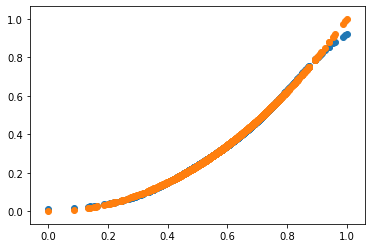

In [16]:
# Plot the predictions
y_pred, e_pred = test(w, b, x, y)
plt.scatter(x, y_pred)
plt.scatter(x, y)